In [ ]:
pip install torchplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for torchplot: filename=torchplot-0.2.0-py3-none-any.whl size=8330 sha256=6abf7a7f7c7713af77a41c73caf84ad49651908dbe55839d68db9272745aa95d
  Stored in directory: /root/.cache/pip/wheels/10/2c/51/20e41cb36ecf77321dfab07bc2119951e030e717222d78d742
Successfully built torchplot


In [ ]:
#Mount your personal Google Drive to colab
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive')
os.chdir('MyDrive')
os.listdir()

Mounted at /content/drive


['Final Project .mp4',
 'Jönköping.mp4',
 'Ditt paket är på väg från Jollyroom.se.PDF',
 'Colab Notebooks',
 'Delphinos',
 'CA15_020516-150342.JPG',
 'Untitled spreadsheet.gsheet',
 'DataEngineeringProject-Group11.docx',
 'kob-tzvh-zka - Jul 20, 2022 (1).gjam',
 'kob-tzvh-zka - Jul 20, 2022.gjam',
 'AI_for_IA']

In [ ]:
if not os.path.isdir("AI_for_IA"): #create subfolder AI_for_IA if it does
  os.mkdir("AI_for_IA") # not already exist
os.chdir("AI_for_IA") #move into the new subfolder => current working directory
os.getcwd() #check which is the current working directory

'/content/drive/MyDrive/AI_for_IA'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

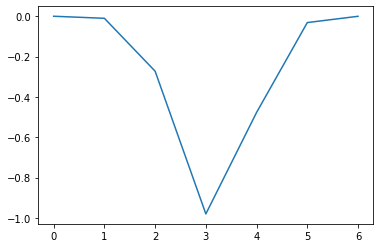

In [6]:
#Problem B.3

#define the function 
def f(x):
    return -np.exp(-(x-3.14)**2)

#define the x axis
x = np.arange(0, 7)
#calculate the function over the x values
y = f(x)

#plotting
plt.plot(x,y)
plt.show()

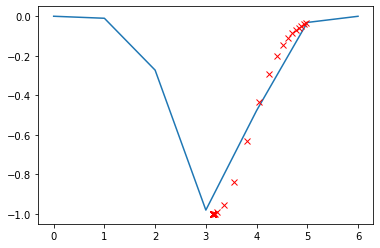

In [7]:
#Problem B.3 continued

#define the derivative of the function
def d(x):
  return -np.exp(-(x-3.14)**2)*(-2*x+6.28)

#choose a starting guess 
x_start = 5
#choose a learning rate
learning_rate = 0.3
#choose number of iteration 
n_iteration = 30

#create empty lists for x and f(x) trajectories
trajectory_x = []
trajectory_fx = []

#set x updated to the initial guess
x_updated = x_start
#create a for loop to update x value for the number of iterations 
for i in range(n_iteration):
  #calculate updated x
  x_updated = x_updated - (learning_rate*d(x_updated))
  #append x and f(x) to the trajectory lists
  trajectory_x.append(x_updated)
  trajectory_fx.append(f(x_updated))

#plotting
plt.plot(x,y,'-',trajectory_x,trajectory_fx,'rx')
plt.show()


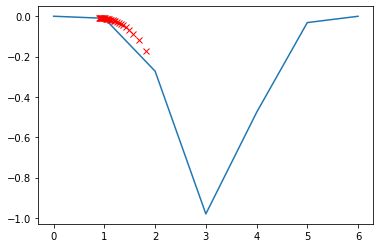

In [13]:
#Problem B.3 continued

#choose a starting guess 
x_start = 2
#choose a learning rate
learning_rate = 0.3
#choose number of iteration 
n_iteration = 30

#create empty lists for x and f(x) trajectories
trajectory_x = []
trajectory_fx = []

#set x updated to the initial guess
x_updated = x_start
#create a for loop to update x value for the number of iterations 
for i in range(n_iteration):
  #calculate updated x
  x_updated = x_updated + (learning_rate*d(x_updated))
  #append x and f(x) to the trajectory lists
  trajectory_x.append(x_updated)
  trajectory_fx.append(f(x_updated))

#plotting
plt.plot(x,y,'-',trajectory_x,trajectory_fx,'rx')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


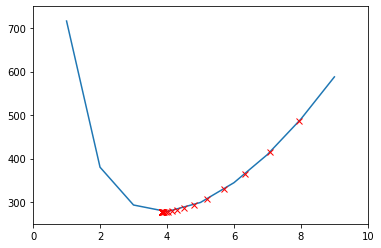

In [15]:
#Problem B.4 

#define the function 
def f(r):
    return 2*np.pi*r**2+(710/r)
#define the x axis
r = np.arange(0,10)
#calculate the function over the x values
y = f(r)

#define the derivative of the function
def d(r):
  return 4*np.pi*r-(710/r**2)

#choose a starting guess 
r_start = 9
#choose a learning rate
learning_rate = 0.01
#choose number of iteration 
n_iteration = 50

#create empty lists for r and f(r) trajectories
trajectory_r = []
trajectory_fr = []

#set r updated to the initial guess
r_updated = r_start
#create a for loop to update r value for the number of iterations 
for i in range(n_iteration):
    #calculate updated r
    r_updated = r_updated - (learning_rate*d(r_updated))
    #append r and f(r) to the trajectory lists
    trajectory_r.append(r_updated)
    trajectory_fr.append(f(r_updated))

#plotting
plt.plot(r,y,'-',trajectory_r,trajectory_fr,'rx')
plt.xlim([0,10])
plt.ylim([250,750])
plt.show()




4 Task C: Auto-differentiation Using PyTorch

1. By hand: 
f'(x) = 4(x-1)^3                                 f'(x=2) = 4(2-1) = 4 

In [16]:
import torch 
from torch import autograd 
import math

In [17]:
#Problem C.1

#define the differentiable function 
def f(x): 
  return torch.pow((x-1),4)+3

#create a tensor with the value were we wish to evaluate 
#the function and its derivative (x=2)
x0 = torch.tensor(2.0, requires_grad=True)

#evaluate the function at x0
fx0 = f(x0)
#apply auto-differentiation at x0 using the autograd engine
fx0.backward()
#retrieve the value of the derivative from the .grad attribute 
x0.grad


tensor(4.)

In [18]:
#Problem C.2

#define the differentiable function 
def f(x,y,z):
  return x*y+x*z+y*z+ torch.pow(x,2)+torch.exp(y)+z*torch.sin(x)

#create 3 tensors with the values were we wish to evaluate 
#the function and its derivative (x=pi, y=2.0, z=2.0)
#pi = torch.Tensor(math.pi)
x0 = torch.tensor(torch.pi, requires_grad=True)
y0 = torch.tensor(2.0, requires_grad=True)
z0 = torch.tensor(2.0, requires_grad=True)

#evaluate the function at x0,y0&z0
f_value = f(x0,y0,z0)
#apply auto-differentiation at x0,y0&z0 using the autograd engine
f_value.backward()

#retrieve the value of the partial derivatives for x0,y0&z0
#from the .grad attribute 
print(x0.grad)
print(y0.grad)
print(z0.grad)


tensor(8.2832)
tensor(12.5306)
tensor(5.1416)


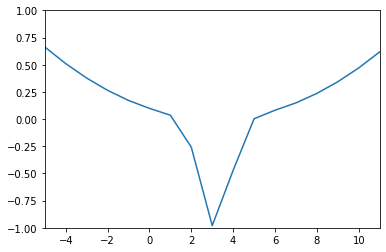

In [25]:
#Problem D.1

#define the differentiable function 
def f(x): 
  return -torch.exp(-(torch.pow(x-torch.pi,2)))+0.01*torch.pow(x-torch.pi,2)

#define x axis
xx = torch.arange(-5,12)
#evaluate the function at the x values
yy = f(xx)

#plotting
plt.plot(xx,yy)
plt.xlim([-5,11])
plt.ylim([-1,1])
plt.show()

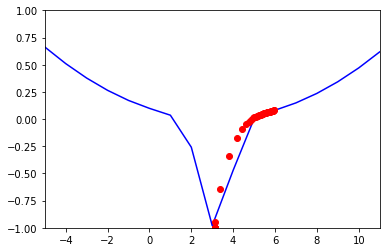

In [30]:
#Problem D.1 continued

#create atensor with the values were we wish to evaluate
#the function and its derivative
x = torch.tensor(6.0, requires_grad=True)

#choose the learning rate
eta = 0.5
#choose number of iteration 
nr_steps = 50

#create empty lists for x and y trajectories
x_=[]
y_=[]
#create a for loop to update x values for the number of iterations 
for i in range(nr_steps): 
  #evaluate the function at x
  fx = f(x)
  #apply auto-differentiation at x using the autograd engine
  fx.backward()
  with torch.no_grad():
    #compute the updated value of x
    x -= eta*x.grad
    #append the updated values of x and f(x) to the assigned lists
    x_.append(x.item())
    y_.append(fx.item())
  x.grad.zero_()

#plotting
#plotting the function 
plt.plot(xx,yy,'b')
#plotting the trajectories
plt.plot(x_,y_,'ro')
plt.xlim([-5,11])
plt.ylim([-1,1])
plt.show()

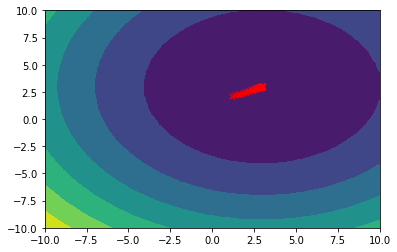

In [31]:
#problem 2D

#define the differentiable function 
def f(x):
  one_vector = torch.ones_like(x)
  return (x-3*one_vector).T @ (x-3*one_vector)

#create atensor with the values were we wish to evaluate
#the function and its derivative
x= torch.tensor([1.0,2.0], requires_grad=True)

#choose the learning rate
eta = 0.05
#choose number of iteration 
nr_steps = 100

#create empty lists for x and y trajectories
x_= []
y_=[]

#create a for loop to update x values for the number of iterations 
for i in range(nr_steps): 
  #evaluate the function at x
  fx = f(x)
  #apply auto-differentiation at x using the autograd engine
  fx.backward()
  with torch.no_grad():
    #compute the updated value of x
    x -= eta*x.grad
    #append the updated values of x and f(x) to the assigned lists
    x_.append(x.tolist())
    y_.append(fx.tolist())
  x.grad.zero_()

#create two vectors for the contour plot axises 
xs = torch.linspace(-10, 10, steps=100)
ys = torch.linspace(-10, 10, steps=100)

#make a mesh grid using the above created vectors
x_grid,y_grid = torch.meshgrid(xs,ys)

#create a matrix of ones with the size of z
z = torch.ones((100,100), dtype=torch.int64)

#populate the z matrix with using nested loop
# by calculating the values of the function
#over the values in xs and ys
for i in range(len(xs)):
  for j in range(len(ys)):
      z[i,j] = torch.pow(xs[i]-3,2)+torch.pow(ys[j]-3,2)

#extract the two variables of x (x1,x2) from the trajectory of x
#and store them in two seperate lists
x1 = [i[0] for i in x_]
x2 = [i[1] for i in x_]

#plotting
plt.contourf(x_grid,y_grid,z)
plt.plot(x1,x2,'rx')
plt.show()


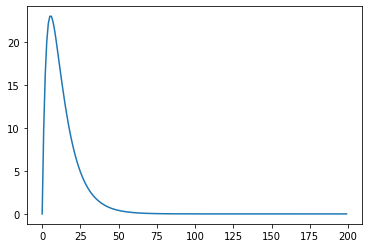

In [32]:
#Problem 3D

#define the differentiable function 
def f(t):
  return 60*(torch.exp(-0.1*t)-torch.exp(-0.3*t))

#define x axis
tt = torch.arange(0,200)
#evaluate the function at the x values
y= f(tt)

#plotting
plt.plot(tt,y)
plt.show()

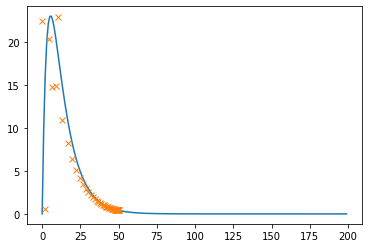

In [40]:
#problem 3D continued

#the 5 lines below are for the use of the inverse of the function
# #define the differentiable function 
# def f(t):
#   return 60*(-torch.exp(-0.1*t)+torch.exp(-0.3*t)) 
# tt = torch.arange(0,200)
# y= f(tt)

#creat a tensor with the value were we wish to evaluate
#the function and its derivative
t= torch.tensor(50.0, requires_grad=True)

#define the multiplication factor of the step length
eta = 0.5
#define number of iterations
nr_steps = 50

#create empty lists to store the trajectories 
t_= []
y_=[]

#loop over the number iteration
for i in range(nr_steps): 
  #compute the function at t
  ft = f(t)
  #apply auto-differentiation at t using the autograd engine
  ft.backward()
  with torch.no_grad():
    #compute the updated value of t
    t += eta*t.grad
    #append the updated values of t and f(t) to the assigned lists
    t_.append(t.item())
    y_.append(ft.item())
  x.grad.zero_()

#plotting
plt.plot(tt,y)
plt.plot(t_,y_,'x')
plt.show()


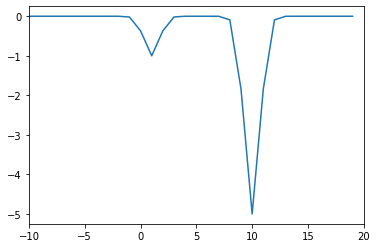

In [64]:
#problem 4D

#define the differentiable function 
def f(x):
  return -torch.exp(-torch.pow(x-1,2))-5*torch.exp(-torch.pow(x-10,2))

#define x axis
xx = torch.arange(-10,20)
#evaluate the function at the x values
yy = f(xx)

#plotting
plt.plot(xx,yy)
plt.xlim([-10,20])
#plt.ylim([-1,1])
plt.show()


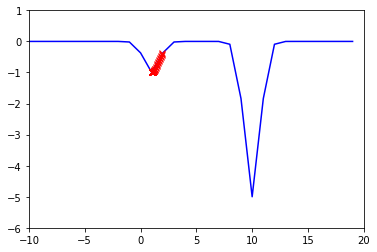

In [65]:
#problem 4D continued 

#creat a tensor with the value were we wish to evaluate
#the function and its derivative
x= torch.tensor(2.0, requires_grad=True)

#define the multiplication factor of the step length
eta = 0.05
#define number of iterations
nr_steps = 50

#create empty lists to store the trajectories 
x_= []
y_=[]

#loop over the number of iterations
for i in range(nr_steps):
  #compute the function at x
  fx = f(x)
  #apply auto-differentiation at x using the autograd engine
  fx.backward()
  with torch.no_grad():
    #compute the updated value of x
    x -= eta*x.grad
    #append the updated values of x and f(x) to the assigned lists
    x_.append(x.item())
    y_.append(fx.item())
  x.grad.zero_()

plt.plot(xx,yy,'b')
plt.plot(x_,y_,'rx')
plt.xlim([-10,20])
plt.ylim([-6,1])
plt.show()


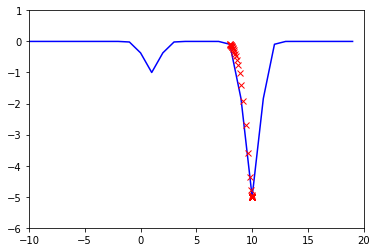

In [66]:
#problem 4D continued 

#creat a tensor with the value were we wish to evaluate
#the function and its derivative
x= torch.tensor(8.0, requires_grad=True)

#define the multiplication factor of the step length
eta = 0.05
#define number of iterations
nr_steps = 50

#create empty lists to store the trajectories 
x_= []
y_=[]

#loop over the number of iterations
for i in range(nr_steps):
  #compute the function at x
  fx = f(x)
  #apply auto-differentiation at x using the autograd engine
  fx.backward()
  with torch.no_grad():
    #compute the updated value of x
    x -= eta*x.grad
    #append the updated values of x and f(x) to the assigned lists
    x_.append(x.item())
    y_.append(fx.item())
  x.grad.zero_()

plt.plot(xx,yy,'b')
plt.plot(x_,y_,'rx')
plt.xlim([-10,20])
plt.ylim([-6,1])
plt.show()

The function only converges to a minima when the initial guess is already on one of the minimum curves. when the initial guess is chosen to be on the stright line, the value of x does not move because the gradient is zero. 
Depending on which minima curve we put our initial guess, x will converges to that minima. 
for example, if we select, x = 8, we will end up in the global minima but if we select x = 2, we will end up in the local minima

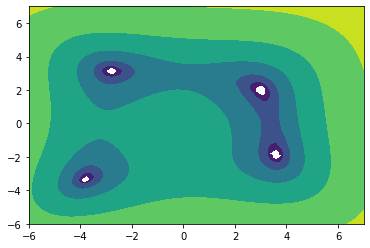

In [67]:
#Problem D.5

def f(x,y): 
  return torch.pow(torch.pow(x,2)+y-11,2)+torch.pow(x+torch.pow(y,2)-7,2)

xs = torch.linspace(-6,7,100)
ys = torch.linspace(-6,7,100)

x_grid,y_grid = torch.meshgrid(xs,ys)

z = torch.ones((100,100), dtype=torch.int64)

for i in range(len(xs)):
  for j in range(len(ys)):
      z[i,j] = f(xs[i],ys[j])

plt.contourf(x_grid,y_grid,torch.log(z))
plt.show()


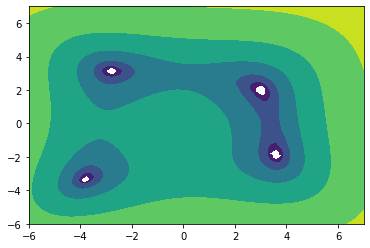

In [82]:
#creat tensors with the values were we wish to evaluate
#the function and its derivative
x= torch.tensor([1.0], requires_grad=True)
y= torch.tensor([2.0], requires_grad=True)

#define the multiplication factor of the step length
eta = 0.05
#define number of iterations
nr_steps = 100

#create empty lists to store the trajectories 
x_= []
y_=[]

#loop over the number of iterations
for i in range(nr_steps):
  #compute the function at x & y
  fxy = f(x,y)
  #apply auto-differentiation at x using the autograd engine
  fxy.backward()
  with torch.no_grad():
    #compute the updated value of x
    x -= eta*x.grad
    y -= eta*x.grad
    #append the updated values of x and f(x) to the assigned lists
    x_.append(x.item())
    y_.append(y.item())
  x.grad.zero_()

plt.contourf(x_grid,y_grid,torch.log(z))
#plt.plot(x_,y_)
plt.show()